In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


In [2]:
df = pd.read_csv('../week02/data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y = df['Survived'] # this is our DV
#X = df.drop(['Survived'], axis= 1, inplace=True) #we have to keep the DV out of the set temporarily keeping this out so I can play with survival for the analysis

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
X = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

In [8]:
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Pclass', ylabel='count'>

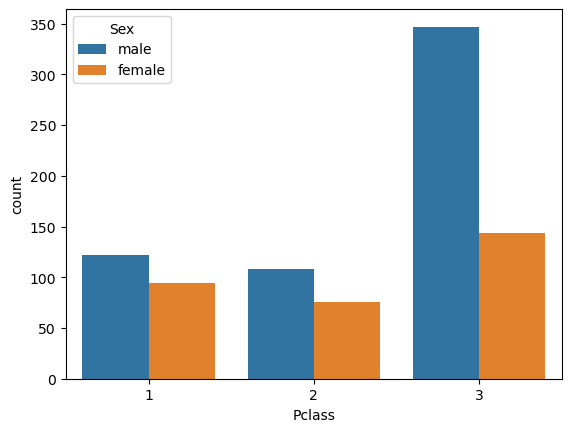

In [10]:
sns.countplot(data=X, x="Pclass", hue = "Sex")

<Axes: xlabel='Pclass', ylabel='count'>

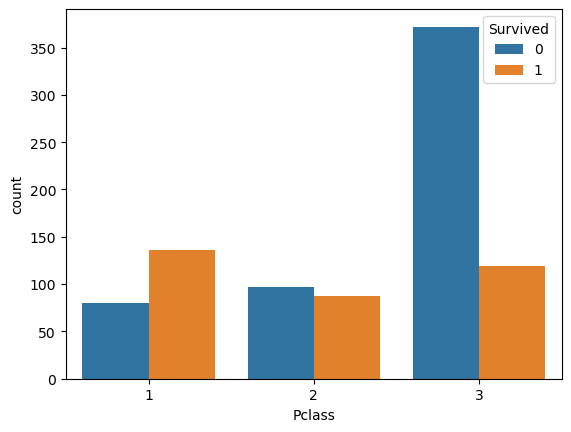

In [11]:
sns.countplot(data=X, x="Pclass",hue = "Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

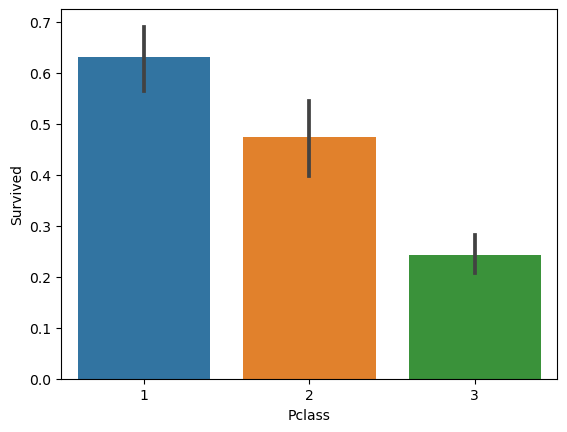

In [12]:
sns.barplot(data=X, x='Pclass', y="Survived") 
#this shows that older people were more likely to have better tickets, and thus, survive

<Axes: xlabel='Pclass', ylabel='Age'>

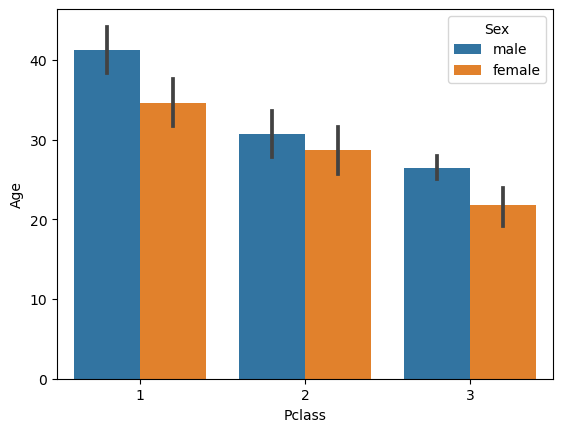

In [13]:
sns.barplot(data=X, x='Pclass', y="Age", hue = "Sex") 
#though there were more men, so this 

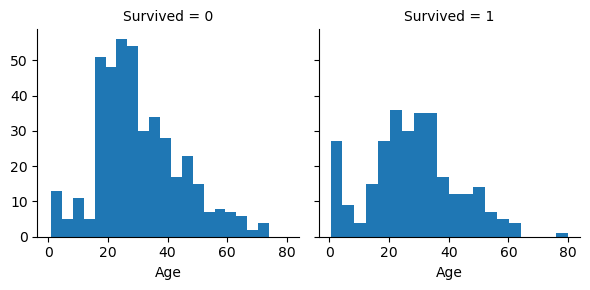

In [46]:
#I have seen this a few times, its facegrid variable then the variable .map with what looks like matplotlib?
g = sns.FacetGrid(X, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<Axes: xlabel='Pclass', ylabel='Survived'>

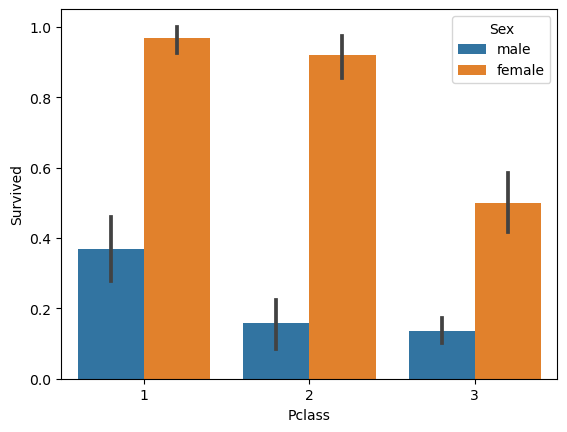

In [14]:
sns.barplot(data=X, x= 'Pclass', y= "Survived", hue= "Sex")

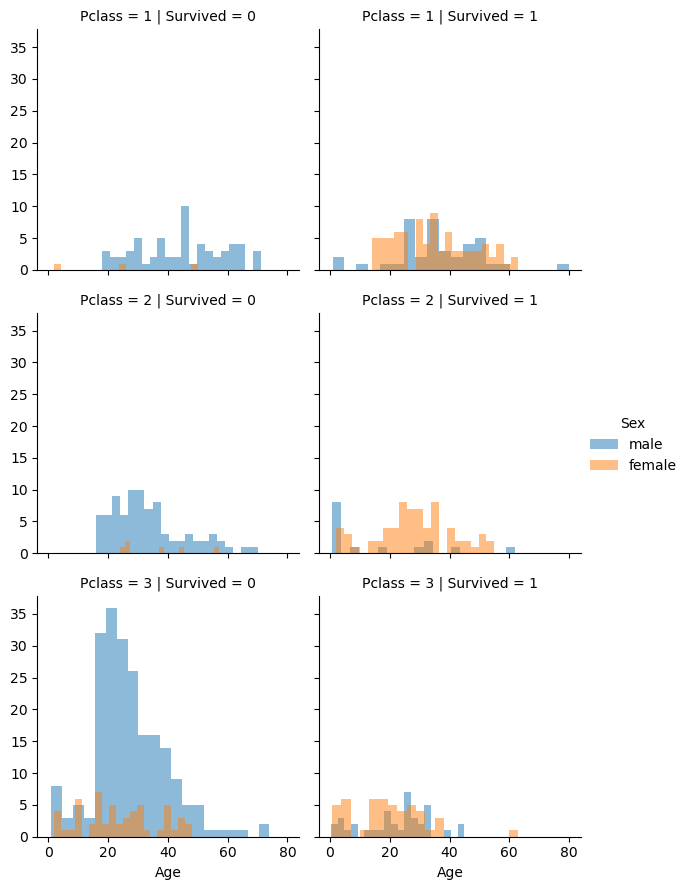

In [15]:
#I am not totally sure how this works but it does present this sort of data quite nicely
#it also shows that very few first class women died at all compared to the rest of the samples
grid = sns.FacetGrid(X, col='Survived', row='Pclass', hue="Sex") 
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<Axes: xlabel='Age', ylabel='Count'>

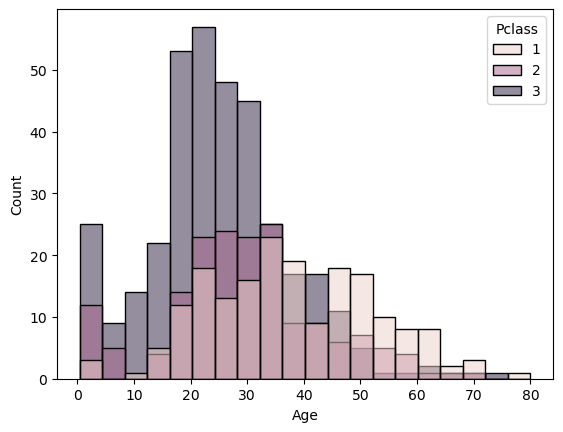

In [16]:
sns.histplot(data=X, x="Age", hue="Pclass", alpha =.5,)

<Axes: xlabel='Age', ylabel='Count'>

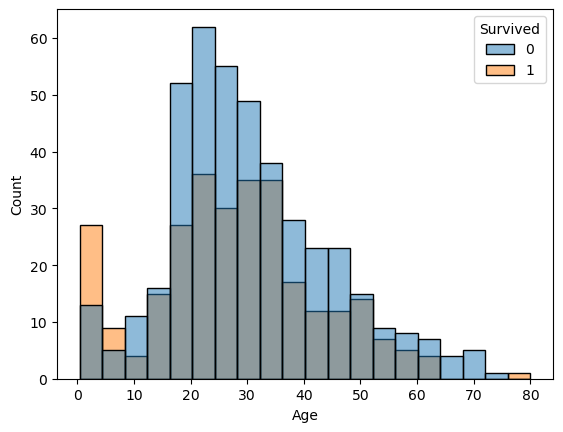

In [17]:
sns.histplot(data=X, x="Age", hue="Survived", alpha =.5,)

<Axes: xlabel='Age', ylabel='Count'>

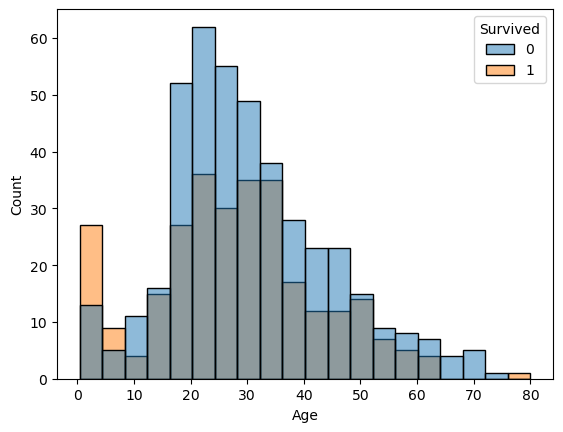

In [18]:
sns.histplot(data=X, x="Age", hue="Survived", alpha =.5,)

<Axes: xlabel='Embarked', ylabel='Pclass'>

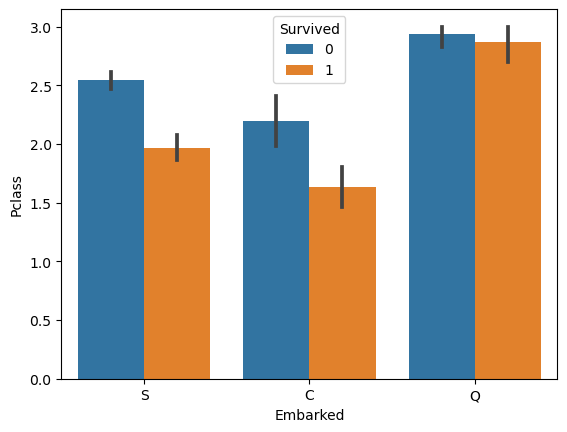

In [39]:
sns.barplot(data=X, x= 'Embarked', y= "Pclass", hue="Survived") 3

In [19]:
df_age= X.groupby('Age')

In [20]:
survived_pclass_df = X[['Survived', 'Pclass']]          # works - just have to say the columns required
survived_pclass_df.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [21]:
#https://notebook.community/vikramsjn/Investigate-Titanic-Dataset/Analysis%20of%20Titanic%20Dataset#Question-1---Did-passenger-class-made-any-difference-to-his-survival?
#this notebook had this section I pulled, I want to understand it though because it did something very precisely with the groupby that I was struggling with for a good half hour


survived_plass_df = X[['Survived', 'Pclass']]          # works - just have to say the columns required
survived_plass_df.head()

## GROUP DATA TO CALCULATE SURVIVED & TOTAL BY PCLASS

## calculate survived by pclass
survived_by_pclass = survived_plass_df.groupby(['Pclass']).sum()
total_by_pclass = survived_plass_df.groupby(['Pclass']).count()

# total are showed as survived - so change to column name Total
total_by_pclass.rename(columns = {'Survived':'Total'}, inplace = True)

# merge separate data into one dataframe
survived_total_by_pclass = pd.merge(survived_by_pclass, total_by_pclass, left_index=True, right_index=True) # merge by index
survived_total_by_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [22]:
#jen's ultra elegant super one line solution to everything
one_line_df = X.groupby(["Pclass","Sex"]).count()[["Survived"]] # you can call columns after that
one_line_df

Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

In [23]:
survived_sex_df = X[['Survived', 'Sex']] #this creates a specific column
survived_sex_df

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [24]:
#survived_by_pclass = survived_plass_df.groupby(['Pclass']).sum()
survived_sex_df = survived_sex_df.groupby(["Sex"]).sum()
total_sex_df = survived_sex_df.groupby(["Sex"]).count()

In [25]:
total_sex_df.rename(columns = {'Survived':'Total'}, inplace = True)


In [26]:
survived_total_by_sex = pd.merge(survived_sex_df, total_sex_df, left_index=True, right_index=True) # merge by index
survived_total_by_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [27]:
X['Age'].mean() # I feel like pandas has a way to insert means into columns

29.69911764705882

In [28]:
X['Age'].fillna(X['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [29]:
age_df = X.groupby(["Survived"])[['Age']].mean() # you can call columns after that
age_df

,Age
Survived,
0,30.626179
1,28.343690
